In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import os
%matplotlib inline


In [2]:
#importing dataset
data=pd.read_csv("advertising.csv")
data.head(5)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


                           SIMPLE LINEAR REGRESSION

In [3]:
#Initialoizing the variables
x = data['TV'].values.reshape(-1,1)
y = data['Sales'].values.reshape(-1,1)

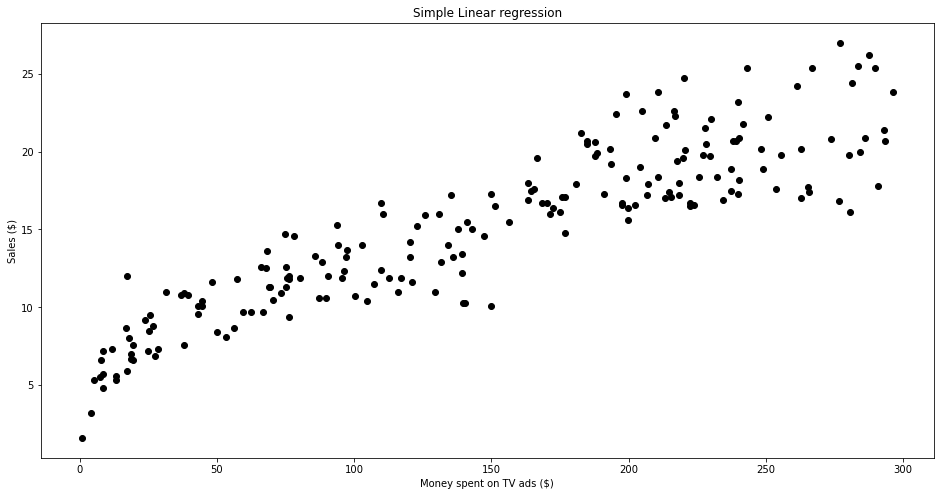

In [4]:
#plotting graph to see the points
plt.figure(figsize=(16,8))
plt.title("Simple Linear regression")
plt.scatter(x,y,c='black')
plt.xlabel("Money spent on TV ads ($)")
plt.ylabel("Sales ($)")
plt.show()


In [5]:
#Splitting dataset to Training and TEsting Dataset
from sklearn .model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size=0.2, random_state=42)
##print(X_train, X_test, Y_train, Y_test)

In [6]:
#Filtering Linear Regression to the training set
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train , Y_train)

LinearRegression()

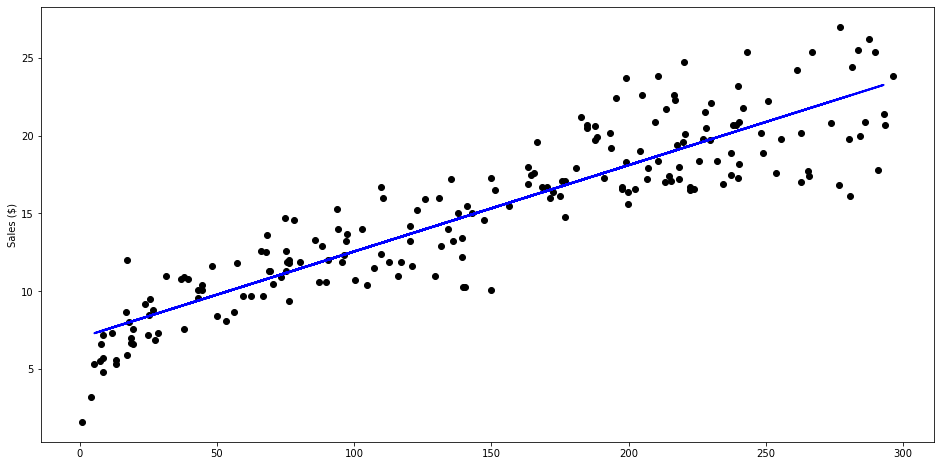

In [7]:
#Pr4edicting the Test set result
y_pred = reg.predict(X_test)
plt.figure(figsize=(16,8))
plt.scatter(x,y, c='black' )
plt.plot(X_test , y_pred , c='blue', linewidth=2)
plt.xlabel=("Money spent on TV ads ($)")
plt.ylabel("Sales ($)")

plt.show()

In [8]:
#Calculating Coffecients( c)
reg.coef_

array([[0.05548294]])

In [9]:
#Calculating the intercept
reg.intercept_

array([7.00710843])

In [10]:
#Calculating THE ACCURACY
from sklearn.metrics import r2_score
r2_score(Y_test , y_pred)

0.802561303423698

           MULTIPLE LINEAR REGRESSION

In [11]:
#Initializing the variables
X=data.drop(['Sales'], axis=1)
Y=data['Sales'].values.reshape(-1,1)

In [12]:
#Splitting our dataset to Training and Testing Dataset
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(X , Y, test_size=0.2 , random_state=42)


In [13]:
#fitting Linera regression to the training set
from sklearn.linear_model import LinearRegression
multiple_reg = LinearRegression()
multiple_reg.fit(X_train , Y_train)

LinearRegression()

In [14]:
#Predicting Test set result
Y_pred= multiple_reg.predict(X_test)

In [15]:
#Calculating the Coefficients
multiple_reg.coef_

array([[0.05450927, 0.10094536, 0.00433665]])

In [16]:
#Calculating intercept
multiple_reg.intercept_

array([4.7141264])

In [17]:
#Calculating the accuracy
from sklearn.metrics import r2_score
r2_score(Y_test, Y_pred)

0.9059011844150826

In [18]:
#Taking input from the user
print("Enter the ammount you will invest on")
#tv =float(input("TV :"))
#radio = float(input("Radio :"))
#newspaper = float(input("newspaper :"))

#predicting the sales with respect to the input:
#output=multiple_reg.predict([[tv , radio ,  newspaper]])
#print("you will get RS{:.2f}sales by advertising RS{} on TV , RS{} on Radio , Rs{} on Newspaper."
    # .format(output[0][0] if output else "not predictable",tv ,radio ,newspaper))


Enter the ammount you will invest on


In [19]:
#Saving the model
filename ='ads'
pickle.dump(multiple_reg, open(filename , 'wb'))

In [20]:
from tkinter import *
import pickle


In [21]:
#Loading the model
loaded_model=pickle.load(open(filename, 'rb'))

In [22]:
#Calculating saleas w.r.t input
def calculate_sale(arg):
    res=loaded_model.predict([[tv.get(),radio.get(),newspaper.get()]])
    sale_label.config(text="Expected Sale :{:.2f}".format(res[0][0]))

In [23]:
#Initialising the tkinter window
master = Tk()
master.geometry("700x400")
master.configure(background='BLUE')
master.title('SALES ESTIMATOR')

''

In [24]:
#Label to show estinmiate sale
sale_label = Label(master , bg='BLUE', fg='WHITE' , font=("Times" , 40 , "bold"),text="Hello Tkinter!")
sale_label.pack(padx=5, pady=5)#The padx and the pady parameters put some space between the widgets. The padx puts some space between the button widgets and between the closeButton and the right border of the root window. The pady puts some space between the button widgets and the borders of the frame and the borders of the root window.

In [25]:
#Scale to take TV advertising investment amount from user
tv = Scale(master ,length=650 ,label="TV", bg='Green', fg='WHITE' , from_=0, to=2000,orient=HORIZONTAL , command=calculate_sale)
tv.set(10)
tv.pack(padx=5, pady=5)

In [26]:
#Scale to take radio advertising investment amount from user
radio = Scale(master ,length=650 ,label="Radio", bg='Green', fg='WHITE' , from_=0, to=2000,orient=HORIZONTAL , command=calculate_sale)
radio.set(10)
radio.pack(padx=5, pady=5)

In [27]:
#Scale to take newspaper advertising investment amount from user
newspaper = Scale(master ,length=650 ,label="Newspaper", bg='Green', fg='WHITE' , from_=0, to=2000,orient=HORIZONTAL , command=calculate_sale)
newspaper.set(10)
newspaper.pack(padx=5, pady=5)

In [28]:
master.mainloop()